In [38]:
import pandas as pd
from scipy.spatial.distance import euclidean
import math


In [39]:
# read csv into dataframe
df = pd.read_csv('../result_train.csv')

# update loss on cell if loss type is l1_loss
for index, row in df.iterrows():
    if row['CostFunc'] == 'l1_loss':
        df.at[index, 'AvgCost'] = row['AvgCost']**2

# sort dataframe based on AvgCost column in ascending order
df = df.sort_values(by='AvgCost')

# save updated dataframe as csv file
df.to_csv('result_sorted_loss.csv', index=False)

# print message indicating success
print('Updated dataframe saved to result_sorted_loss.csv')


Updated dataframe saved to result_sorted_loss.csv


In [40]:
def modified_euclidean_distance(x, y):
    distance = 0
    for i in range(0,len(x)):
        if x[i] == 0.0:
            x[i] = 1e-10
        if y[i] == 0.0:
            y[i] = 1e-10
        r = ((x[i] - y[i]) ** 2) * (max(x[i]/y[i], y[i]/x[i]) ** 2)
        distance += r

    
    return math.sqrt(distance)


def scientific_to_float(scientific_notation):
    parts = scientific_notation.split('e')
    if len(parts) == 1:
        return float(parts[0])
    else:
        a, b = parts[0], int(parts[1])
        if '.' in a:
            c = len(a) - a.index('.') - 1
            a = a.replace('.', '')
            b -= c
        if b < 0:
            return float(a) / (10 ** abs(b))
        else:
            return float(a) * (10 ** b)

In [41]:
import pandas as pd

# Load the original CSV
df = pd.read_csv('result_sorted_loss.csv')

# Create two dataframes: first 10 rows and the rest
good_runs = df.head(1)
bad_runs = df.tail(len(df)-1)  # or simply: bad_runs = df[10:]

# Save these dataframes to new CSV files
good_runs.to_csv('GoodRuns.csv', index=False)
bad_runs.to_csv('BadRuns.csv', index=False)



In [42]:

# read CSV file
df_good = pd.read_csv('GoodRuns.csv')
df_bad = pd.read_csv('BadRuns.csv')

import numpy as np
import re

import numpy as np
import re

# method to handle nested list in csv
def handle_nested_list(list_str):
    list_str = list_str.strip('[]')
    # Split the string by the first occurrence of '[', which indicates the start of the nested list
    first_part, last_part = re.split(r'\s*\[\s*', list_str)
    # remove trailing comma from first_part
    first_part = first_part.rstrip(',')
    first_part_nums = list(map(float, first_part.split(',')))
    # remove trailing ']' from last_part
    last_part = last_part.rstrip(']')
    last_part_nums = list(map(float, last_part.split(',')))
    return first_part_nums, last_part_nums

# rest of your code goes here...


# initialize lists to store the sums for each parameter
param_sum_BestSol1_first = [0] * 7
param_sum_BestSol1_last = [0] * 12

# iterate over each row in the BestSol1 column
for x in df_good['BestSol1']:
    # convert the string to lists of floats
    params_first, params_last = handle_nested_list(x)
    # add the values of each parameter to the running total
    for i in range(len(params_first)):
        param_sum_BestSol1_first[i] += params_first[i]
    for i in range(len(params_last)):
        param_sum_BestSol1_last[i] += params_last[i]

# divide each sum by the number of rows to get the mean
num_rows = len(df_good)
param_mean_good_BestSol1_first = [x / num_rows for x in param_sum_BestSol1_first]
param_mean_good_BestSol1_last = [x / num_rows for x in param_sum_BestSol1_last]

# print the results
print("Mean Good Results (AvgCost < 1e-5):")
print(param_mean_good_BestSol1_first)
print(param_mean_good_BestSol1_last)
print()

# now do the same for the bad results
param_sum_BestSol1_first = [0] * 7
param_sum_BestSol1_last = [0] * 12

for x in df_bad['BestSol1']:
    # convert the string to lists of floats
    params_first, params_last = handle_nested_list(x)
    # add the values of each parameter to the running total
    for i in range(len(params_first)):
        param_sum_BestSol1_first[i] += params_first[i]
    for i in range(len(params_last)):
        param_sum_BestSol1_last[i] += params_last[i]

# divide each sum by the number of rows to get the mean
num_rows = len(df_bad)
param_mean_bad_BestSol1_first = [x / num_rows for x in param_sum_BestSol1_first]
param_mean_bad_BestSol1_last = [x / num_rows for x in param_sum_BestSol1_last]

# print the results
print("Mean Bad Results (AvgCost > 1e-5):")
print(param_mean_bad_BestSol1_first)
print(param_mean_bad_BestSol1_last)



Mean Good Results (AvgCost < 1e-5):
[0.004567078605466929, 34.79322859245309, 0.29202462870265766, 29.491263400483067, 0.0699933103457987, 0.021029190720097235, 10.176763335290218]
[5.587374404937209, 4.249949639745791, 4.413201870979368, 3.967999258275023, 5.037929809366443, 4.4191254049627995, 5.352663610099312, 5.23722543553432, 5.683575363897293, 3.8947678262854497, 5.976743426457268, 5.204097550489922]

Mean Bad Results (AvgCost > 1e-5):
[-0.15046121681431301, 40.90916963808787, 0.24731284504742398, 66.76714156463649, 0.35192247949684563, 0.04605525584167948, 32.93175917405624]
[6.36167768040897, 4.1841790271880095, 4.109775414903346, 3.6755042922207357, 4.367311679178391, 4.044152808380137, 3.895307540440736, 3.7532701292399637, 2.9412077162504255, 2.814748344706036, 2.48071677186326, 2.0841411596190818]


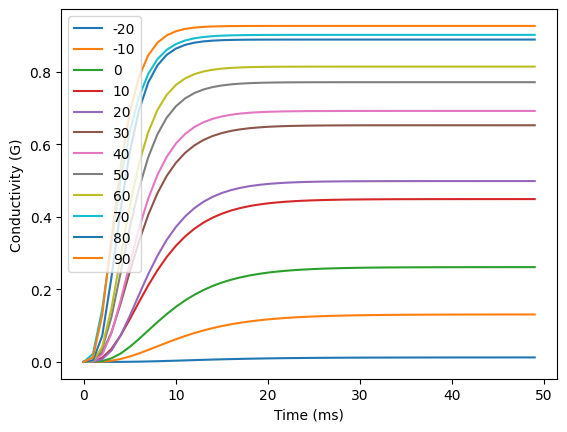

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dict= {"-20" : 0,
       "-10" : 1,
       "0" : 2,
       "10" : 3,
       "20" : 4,
       "30" : 5,
       "40" : 6,
       "50" : 7,
       "60" : 8,
       "70" : 9,
       "80" : 10,
       "90" : 11
}

C = [param_mean_good_BestSol1_first, param_mean_good_BestSol1_last]

def alpha_n(V):
    result_alpha = (C[0][0] * (V + C[0][1])) / (1 - np.exp(-C[0][2] * (V + C[0][3])))
    return result_alpha

def beta_n(V):
    result_beta = C[0][4] * (np.exp(-C[0][5] * ( V + C[0][6] )))
    return result_beta

def n_inf(alpha, beta):
    result_n_inf =  alpha / (alpha + beta)
    return result_n_inf

def tau_n(alpha, beta):
    result_tau = 1 / (alpha + beta)
    return result_tau

def n_pow_4(n, params, Vi):
    idx = dict[str(Vi)]
    c8 = params[idx]
    result_n =  n ** c8
    return result_n


def get_y(t, V):
    alpha = alpha_n(V)
    beta = beta_n(V)
    n_inf_ = n_inf(alpha, beta)
    tau_n_ = tau_n(alpha, beta)
    n = n_inf_ * (1 - np.exp(-t/tau_n_))
    y_hat = n_pow_4(n, C[-1], V) 
    return y_hat


dataset = []
n = 0
t_total = 50
VOLTS = np.arange(-20, 100, 10)
results = []

for V in VOLTS:
    voltage_results = []
    for t in np.arange(0, t_total):
        y = get_y(t, V)
        voltage_results.append(y)
        dataset.append((t, V, y))
    results.append(voltage_results)


graph_df = pd.DataFrame(results)
graph_df = graph_df.T
dataset_df = pd.DataFrame(dataset)
graph_df.plot()
plt.legend(np.arange(-20, 100, 10))
plt.xlabel("Time (ms)")
plt.ylabel("Conductivity (G)")
plt.show()

graph_df.to_csv('GeneratedDataBasedGAParams/graph_df_based_ga_params.csv', index=False)
dataset_df.to_csv('GeneratedDataBasedGAParams/dataset_based_ga_params.csv', index=False)


In [44]:
import pandas as pd
import numpy as np

def logcosh_loss(y_hat, y):
    return np.log(np.cosh(y_hat - y))

generated_df_based_params = pd.read_csv('GeneratedDataBasedGAParams/dataset_based_ga_params.csv')
test_df = pd.read_csv('DatasetTest/test.csv')
print(generated_df_based_params.shape)
print(test_df.shape)
# Get the values in column 2 of generated_df_based_params and test_df
generated_values = generated_df_based_params.iloc[:, 2]
test_values = test_df.iloc[:, 2]

# Calculate the logcosh loss for each pair of values
loss_sum = 0
num_rows = len(generated_df_based_params)  # Assuming both dataframes have the same number of rows

for i in range(num_rows):
    loss = logcosh_loss(generated_values[i], test_values[i])
    loss_sum += loss

# Calculate the average loss
average_loss = loss_sum / num_rows

# Print the average loss
print("Average Logcosh Loss: ", average_loss)


(600, 3)
(600, 3)
Average Logcosh Loss:  0.0009240895213466588


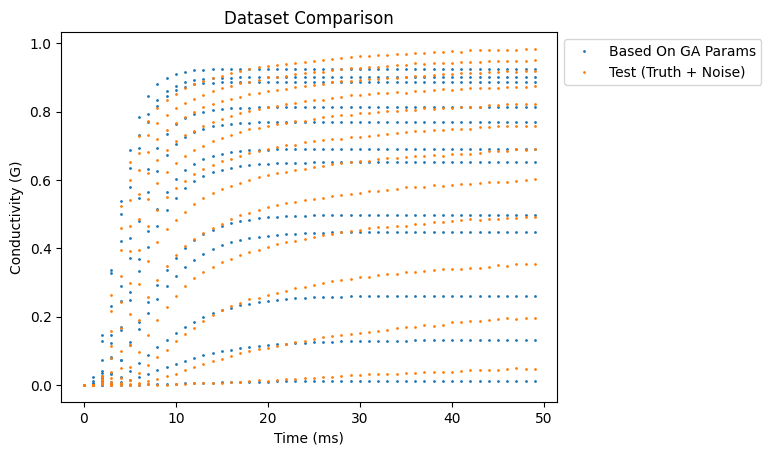

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the two dataframes
based_generated = pd.read_csv('GeneratedDataBasedGAParams/dataset_based_ga_params.csv', header=None)
based_generated = based_generated.drop(based_generated.index[0])
Test_df = pd.read_csv('DatasetTest/test.csv', header=None)
Test_df = Test_df.drop(Test_df.index[0])

based_generated.columns = ['Time', 'Temp', 'Value']
Test_df.columns = ['Time', 'Temp', 'Value']

# Convert 'Time' and 'Value' to numeric types
based_generated['Time'] = pd.to_numeric(based_generated['Time'])
based_generated['Value'] = pd.to_numeric(based_generated['Value'])
Test_df['Time'] = pd.to_numeric(Test_df['Time'])
Test_df['Value'] = pd.to_numeric(Test_df['Value'])

# Plot df1 with smaller markers
plt.plot(based_generated['Time'], based_generated['Value'], 'o', label='Based On GA Params', markersize=1)

# Plot df2 with smaller markers
plt.plot(Test_df['Time'], Test_df['Value'], 'o', label='Test (Truth + Noise)', markersize=1)

# Add title and labels
plt.title('Dataset Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Conductivity (G)')

# Adjust the legend position outside the plot and to the right side
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


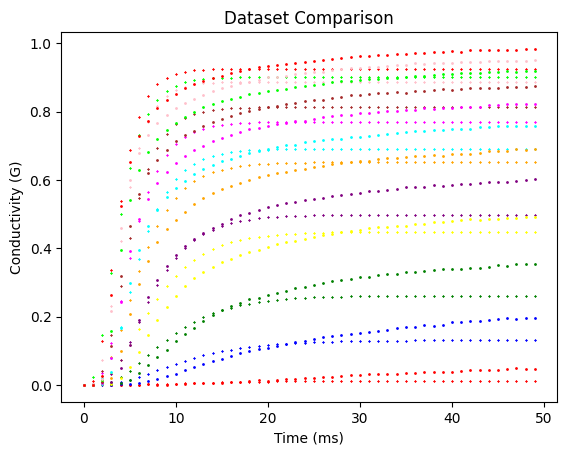

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the colors you want to use
colors = ["red", "blue", "green", "yellow", "purple", "orange", "cyan", "magenta", "brown", "lime", "pink"]

# Read the two dataframes
based_generated = pd.read_csv('GeneratedDataBasedGAParams/dataset_based_ga_params.csv', header=None)
based_generated = based_generated.drop(based_generated.index[0])
Test_df = pd.read_csv('DatasetTest/test.csv', header=None)
Test_df = Test_df.drop(Test_df.index[0])

based_generated.columns = ['Time', 'Temp', 'Value']
Test_df.columns = ['Time', 'Temp', 'Value']

# Convert 'Time', 'Temp' and 'Value' to numeric types
based_generated['Time'] = pd.to_numeric(based_generated['Time'])
based_generated['Temp'] = pd.to_numeric(based_generated['Temp'])
based_generated['Value'] = pd.to_numeric(based_generated['Value'])
Test_df['Time'] = pd.to_numeric(Test_df['Time'])
Test_df['Temp'] = pd.to_numeric(Test_df['Temp'])
Test_df['Value'] = pd.to_numeric(Test_df['Value'])

# Create a dictionary mapping Temp values to colors (wrap around the color list if more Temp values than colors)
temp_values = sorted(based_generated["Temp"].unique())
temp_color = {temp: colors[i % len(colors)] for i, temp in enumerate(temp_values)}

# Plot df1 with smaller markers
for temp in based_generated['Temp'].unique():
    plt.plot(based_generated.loc[based_generated['Temp'] == temp, 'Time'], 
             based_generated.loc[based_generated['Temp'] == temp, 'Value'], 'x', 
             label=f'Based On GA Params, Temp={temp}', 
             color=temp_color[temp], markersize=1)

# Plot df2 with smaller markers
for temp in Test_df['Temp'].unique():
    plt.plot(Test_df.loc[Test_df['Temp'] == temp, 'Time'], 
             Test_df.loc[Test_df['Temp'] == temp, 'Value'], 'o', 
             label=f'Test (Truth + Noise), Temp={temp}', 
             color=temp_color[temp], markersize=1)

# Add title and labels
plt.title('Dataset Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Conductivity (G)')


# Show the plot
plt.show()
